# PN2V Prediction
Please run the `2_ProbabilisticNoise2VoidTraining.ipynb` notebook first.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import torch
from tifffile import imread

from ppn2v.unet.model import UNet
from ppn2v import utils, prediction
from ppn2v.noise_models import histNoiseModel, gaussianMixtureNoiseModel

# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Load Data

In [2]:
# We need the training data in order to calulate 'mean' and 'std' for normalization
path='../../../data/Mouse skull nuclei/'

# Load the test data
dataTest=imread(path+"example2_digital_offset300.tif")[:,:,:256] 
# We are loading only a sub image to speed up computation

# We estimate the ground truth by averaging.
dataTestGT=np.mean(dataTest[:,...],axis=0)[np.newaxis,...]



### Load the correct `namePN2VModel` and `dataName`

In [3]:
dataName = 'mouseskullnuclei'# Use the same name as used in 2_ProbabilisticNoise2VoidTraining.ipynb. This is a part of model name created in ProbabilisticNoise2VoidTraining.ipynb
# Load the noiseModel of interest 
nameNoiseModel ='HistNoiseModel_'+dataName+'_'+'calibration'
#nameNoiseModel='GMMNoiseModel_'+dataName+'_'+str(3)+'_'+str(2)+'_'+'calibration'
#nameNoiseModel ='HistNoiseModel_'+dataName+'_'+'bootstrap'
#nameNoiseModel='GMMNoiseModel_'+dataName+'_'+str(3)+'_'+str(2)+'_'+'bootstrap'


In [4]:
namePN2VModel=nameNoiseModel
net=torch.load(path+"/last_"+namePN2VModel+".net")
if('HistNoiseModel' in namePN2VModel):
    histogram = np.load(path+nameNoiseModel+'.npy') 
    noiseModel= histNoiseModel.NoiseModel(histogram, device=device)
elif('GMMNoiseModel' in namePN2VModel):
    params= np.load(path+nameNoiseModel+'.npz')
    noiseModel = gaussianMixtureNoiseModel.GaussianMixtureNoiseModel(params = params, device = device)    

### Evaluation

image: 0
PSNR input 28.02423798473431
PSNR prior 35.49264406526439
PSNR mse 36.117567843568466
-----------------------------------
image: 1
PSNR input 28.065531602490644
PSNR prior 35.57761897456761
PSNR mse 36.24334238792936
-----------------------------------
image: 2
PSNR input 28.035021421910734
PSNR prior 35.56333050237308
PSNR mse 36.22517721911328
-----------------------------------
image: 3
PSNR input 28.087744381628678
PSNR prior 35.5942251533436
PSNR mse 36.257988331432365
-----------------------------------
image: 4
PSNR input 28.061745249613562
PSNR prior 35.48726917151525
PSNR mse 36.13194920222365
-----------------------------------
image: 5
PSNR input 28.1086316653067
PSNR prior 35.6122413068039
PSNR mse 36.295470849322264
-----------------------------------
image: 6
PSNR input 28.11584919615069
PSNR prior 35.66659010251235
PSNR mse 36.33565272130931
-----------------------------------
image: 7
PSNR input 28.078571033189487
PSNR prior 35.59138381961152
PSNR mse 36.269001

image: 63
PSNR input 28.12501501087707
PSNR prior 35.71174780085207
PSNR mse 36.41559683673415
-----------------------------------
image: 64
PSNR input 28.07112598033649
PSNR prior 35.6184744161731
PSNR mse 36.31283781618906
-----------------------------------
image: 65
PSNR input 28.096510397485332
PSNR prior 35.618433637187934
PSNR mse 36.274202083627436
-----------------------------------
image: 66
PSNR input 28.129393849352013
PSNR prior 35.65453962529105
PSNR mse 36.33724864243747
-----------------------------------
image: 67
PSNR input 28.11863774042713
PSNR prior 35.61743771609967
PSNR mse 36.302745936390984
-----------------------------------
image: 68
PSNR input 28.0744924081312
PSNR prior 35.59385451097508
PSNR mse 36.25998814114254
-----------------------------------
image: 69
PSNR input 28.087115550087496
PSNR prior 35.637958765077585
PSNR mse 36.323677717548144
-----------------------------------
image: 70
PSNR input 28.100664171847036
PSNR prior 35.652218852895714
PSNR ms

image: 125
PSNR input 28.072423743733374
PSNR prior 35.56024915902637
PSNR mse 36.21859142943456
-----------------------------------
image: 126
PSNR input 28.10362116835521
PSNR prior 35.58779527279149
PSNR mse 36.2626184108402
-----------------------------------
image: 127
PSNR input 28.0866054971337
PSNR prior 35.58095606690025
PSNR mse 36.221169507544616
-----------------------------------
image: 128
PSNR input 28.074943517260927
PSNR prior 35.665002117055884
PSNR mse 36.31306800690052
-----------------------------------
image: 129
PSNR input 28.11689860560632
PSNR prior 35.58999684709677
PSNR mse 36.26320435967582
-----------------------------------
image: 130
PSNR input 28.080942114379344
PSNR prior 35.53192524753453
PSNR mse 36.19161040135677
-----------------------------------
image: 131
PSNR input 28.079838325466856
PSNR prior 35.558032021424665
PSNR mse 36.23069295704227
-----------------------------------
image: 132
PSNR input 28.115379662314908
PSNR prior 35.605427667223324


image: 187
PSNR input 28.12713881880164
PSNR prior 35.56793893784904
PSNR mse 36.23353553097349
-----------------------------------
image: 188
PSNR input 28.13034668273638
PSNR prior 35.585152785828
PSNR mse 36.23529578969499
-----------------------------------
image: 189
PSNR input 28.10561031416221
PSNR prior 35.603449247548966
PSNR mse 36.27189041535942
-----------------------------------
image: 190
PSNR input 28.111479741803066
PSNR prior 35.54342824835869
PSNR mse 36.18989120545929
-----------------------------------
image: 191
PSNR input 28.07092498764707
PSNR prior 35.572734791926536
PSNR mse 36.24788628035846
-----------------------------------
image: 192
PSNR input 28.166413092352876
PSNR prior 35.64334660617925
PSNR mse 36.32598079036449
-----------------------------------
image: 193
PSNR input 28.087727009670633
PSNR prior 35.48796375718946
PSNR mse 36.15386812857053
-----------------------------------
image: 194
PSNR input 28.11679210976056
PSNR prior 35.57746054405288
PSNR

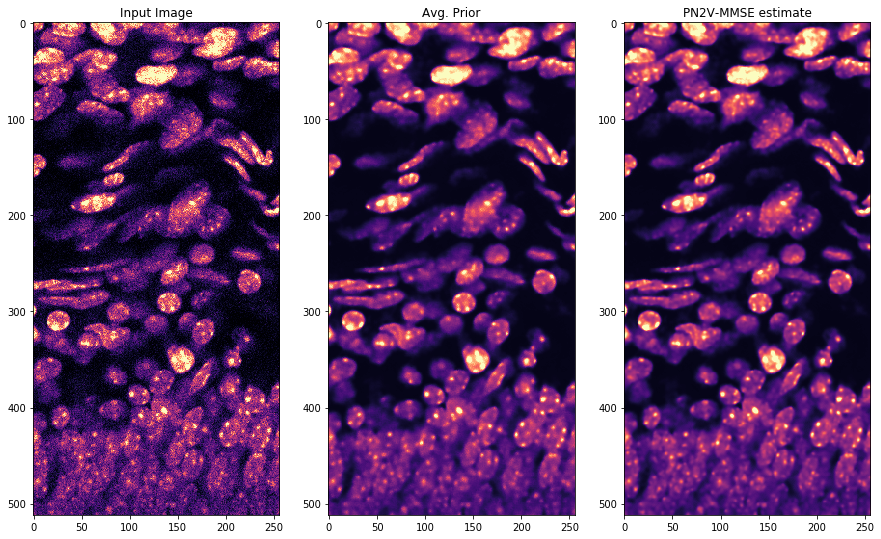

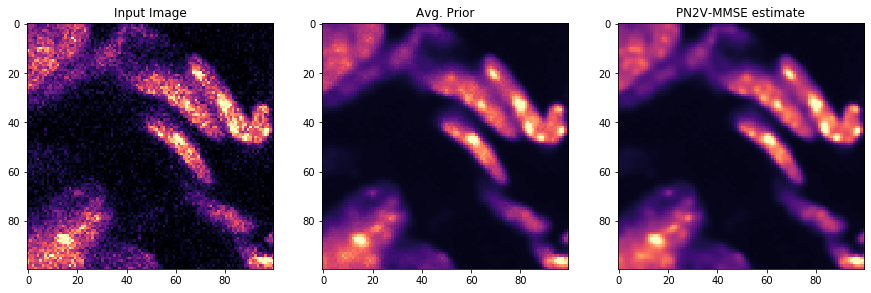

Avg PSNR Prior: 35.618860099718475 +-(2SEM) 0.008473202223071399
Avg PSNR MMSE: 36.29595157750464 +-(2SEM) 0.010361343446212966


In [5]:
# Now we are processing data and calculating PSNR values.
results=[]
meanRes=[]
resultImgs=[]
inputImgs=[]

# We iterate over all test images.
for index in range(dataTest.shape[0]):
    
    im=dataTest[index]
    gt=dataTestGT[0] # The ground truth is the same for all images
    
    # We are using tiling to fit the image into memory
    # If you get an error try a smaller patch size (ps)
    means, mseEst = prediction.tiledPredict(im, net, ps=128, overlap=48,
                                             device=device, noiseModel=noiseModel)

    
    resultImgs.append(mseEst)
    inputImgs.append(im)

    rangePSNR=np.max(gt)-np.min(gt)
    psnr=utils.PSNR(gt, mseEst,rangePSNR )
    psnrPrior=utils.PSNR(gt, means,rangePSNR )
    results.append(psnr)
    meanRes.append(psnrPrior)

    print ("image:",index)
    print ("PSNR input",utils.PSNR(gt, im, rangePSNR))
    print ("PSNR prior",psnrPrior) # Without info from masked pixel
    print ("PSNR mse",psnr) # MMSE estimate using the masked pixel
    print ('-----------------------------------')

    
    
    
# We display the results for the last test image       
vmi=np.percentile(gt,0.01)
vma=np.percentile(gt,99)

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.title(label='Input Image')
plt.imshow(im, vmax=vma, vmin=vmi, cmap='magma')

plt.subplot(1, 3, 2)
plt.title(label='Avg. Prior')
plt.imshow(means, vmax=vma, vmin=vmi, cmap='magma')

plt.subplot(1, 3, 3)
plt.title(label='PN2V-MMSE estimate')
plt.imshow(mseEst, vmax=vma, vmin=vmi, cmap='magma')
plt.show()

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.title(label='Input Image')
plt.imshow(im[100:200,150:250], vmax=vma, vmin=vmi, cmap='magma')

plt.subplot(1, 3, 2)
plt.title(label='Avg. Prior')
plt.imshow(means[100:200,150:250], vmax=vma, vmin=vmi, cmap='magma')

plt.subplot(1, 3, 3)
plt.title(label='PN2V-MMSE estimate')
plt.imshow(mseEst[100:200,150:250], vmax=vma, vmin=vmi, cmap='magma')
plt.show()

print("Avg PSNR Prior:", np.mean(np.array(meanRes) ), '+-(2SEM)',2*np.std(np.array(meanRes) )/np.sqrt(float(len(meanRes)) ) )
print("Avg PSNR MMSE:", np.mean(np.array(results) ),  '+-(2SEM)' ,2*np.std(np.array(results) )/np.sqrt(float(len(results)) ) )